In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from PIL import Image

### Matplotlib settings

In [39]:
%matplotlib inline
matplotlib.rc("font", size=18, family="serif")
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['figure.figsize'] = (11, 11)
from matplotlib.ticker import MultipleLocator
matplotlib.interactive(False)
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]


### Seaborn settings

In [40]:
sns.set(
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
sns_palette = sns.cubehelix_palette(start=0.5, rot=-0.75, dark=0.3, light=0.8, as_cmap=True)

### Path to data files

In [41]:
import os
file_path = os.path.join("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents")



In [42]:
filename = "currentoriginal.csv"
file_ori = os.path.join(file_path, filename)
df_original = pd.read_csv(file_ori)
filename = "currentreference.csv"
file_ref = os.path.join(file_path, filename)
df_ref = pd.read_csv(file_ref)

### Quicklook of original data

In [43]:
df_original.head

<bound method NDFrame.head of              x         y  z  freq1=2.50  freq2=2.52  freq3=2.53  freq4=2.54  \
0    -0.101115 -0.101115  0    0.248821    0.426834    0.654533    1.312963   
1    -0.098345 -0.101115  0    3.213164    3.239818    3.850496    4.816214   
2    -0.095574 -0.101115  0    6.116896    6.022308    7.484880    6.332349   
3    -0.092804 -0.101115  0    5.694385    5.818884    5.239520    3.496947   
4    -0.090034 -0.101115  0    7.241050    7.443107    7.868888    5.570155   
...        ...       ... ..         ...         ...         ...         ...   
5471  0.090034  0.101115  0    6.507016    6.485744    4.244997    1.702216   
5472  0.092804  0.101115  0    4.730695    4.881632    5.338038    3.650646   
5473  0.095574  0.101115  0    3.884758    3.609466    5.258237    3.729966   
5474  0.098345  0.101115  0    3.164996    3.163103    3.595049    5.206892   
5475  0.101115  0.101115  0    0.507659    0.306654    1.201869    1.598634   

      freq5=2.56  fre

### Quicklook of reference data

In [44]:
df_ref.head

<bound method NDFrame.head of              x         y  z  freq1=2.50  freq2=2.52  freq3=2.53  freq4=2.54  \
0    -0.101115 -0.101115  0    1.682571    1.652956    2.170606    1.947929   
1    -0.098345 -0.101115  0    3.919528    3.851453    5.062416    4.542795   
2    -0.095574 -0.101115  0    5.003035    4.918838    6.479615    5.813705   
3    -0.092804 -0.101115  0    5.770523    5.665964    7.424525    6.663781   
4    -0.090034 -0.101115  0    5.630984    5.535289    7.286774    6.538195   
...        ...       ... ..         ...         ...         ...         ...   
5471  0.090034  0.101115  0    4.583610    4.500778    5.898866    5.294379   
5472  0.092804  0.101115  0    3.564381    3.500262    4.589113    4.118752   
5473  0.095574  0.101115  0    3.642987    3.578297    4.695887    4.214322   
5474  0.098345  0.101115  0    3.046618    2.993525    3.933797    3.530075   
5475  0.101115  0.101115  0    1.193255    1.173854    1.549899    1.390409   

      freq5=2.56  fre

### Print a list of all the column names

In [45]:
column_names = df_original.columns.tolist()
print(column_names)

['x', 'y', 'z', 'freq1=2.50', 'freq2=2.52', 'freq3=2.53', 'freq4=2.54', 'freq5=2.56', 'freq6=2.58', 'freq7=2.59', 'freq8=2.60', 'freq9=2.62', 'freq10=2.63', 'freq11=2.65', 'freq12=2.67', 'freq13=2.68', 'freq14=2.69', 'freq15=2.71', 'freq16=2.73', 'freq17=2.74', 'freq18=2.75', 'freq19=2.77', 'freq20=2.79', 'freq21=2.80', 'freq22=2.81', 'freq23=2.83', 'freq24=2.84', 'freq25=2.86', 'freq26=2.88', 'freq27=2.89', 'freq28=2.90', 'freq29=2.92', 'freq30=2.94', 'freq31=2.95', 'freq32=2.96', 'freq33=2.98', 'freq34=3.00', 'freq35=3.01', 'freq36=3.02', 'freq37=3.04', 'freq38=3.05', 'freq39=3.07', 'freq40=3.08', 'freq41=3.10', 'freq42=3.12', 'freq43=3.13', 'freq44=3.15', 'freq45=3.16', 'freq46=3.17', 'freq47=3.19', 'freq48=3.21', 'freq49=3.22', 'freq50=3.23', 'freq51=3.25', 'freq52=3.27', 'freq53=3.28', 'freq54=3.29', 'freq55=3.31', 'freq56=3.33', 'freq57=3.34', 'freq58=3.35', 'freq59=3.37', 'freq60=3.38', 'freq61=3.40', 'freq62=3.42', 'freq63=3.43', 'freq64=3.45', 'freq65=3.46', 'freq66=3.48', 'fr

### Plot a few sample surface currents

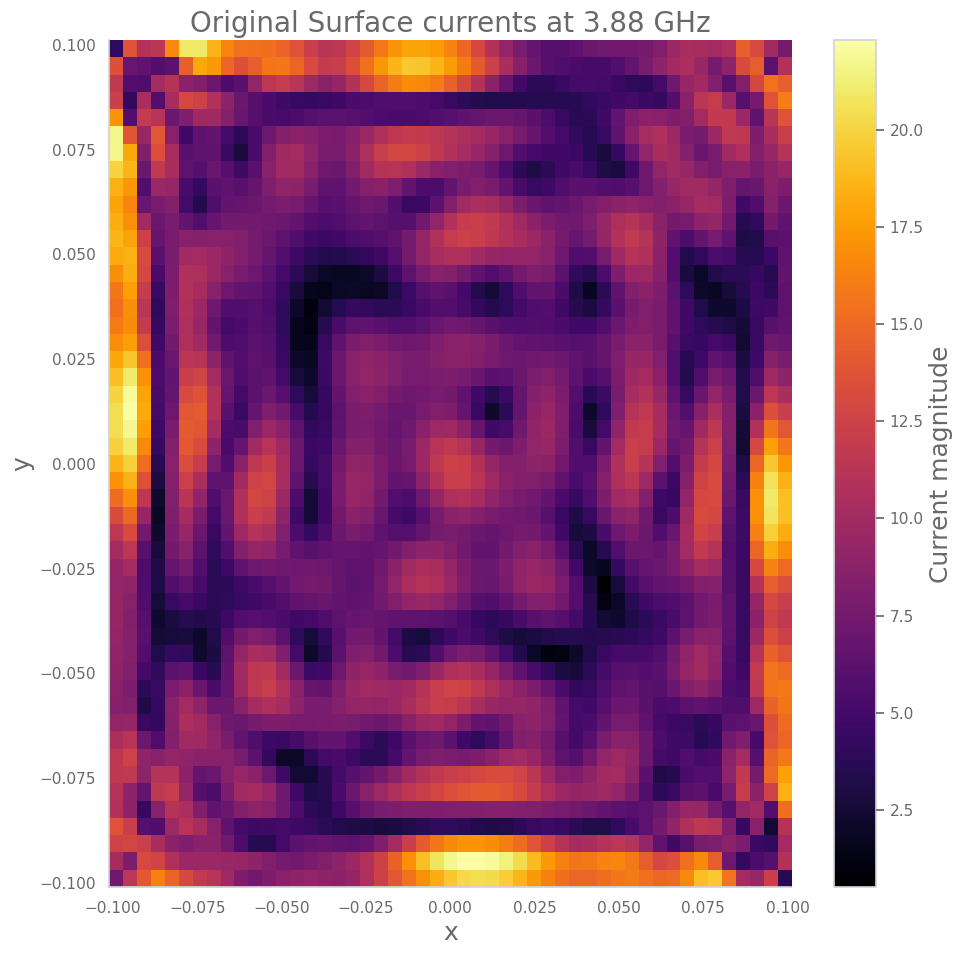

In [46]:
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_original['x'].min(), df_original['x'].max(), nx)
yi = np.linspace(df_original['y'].min(), df_original['y'].max(), ny)

# Create a 2D histogram (like binning the data)
grid, xedges, yedges = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi], weights=df_original['freq93=3.88'])

# Normalize by counts to get average value per bin
counts, _, _ = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi])
with np.errstate(divide='ignore', invalid='ignore'):
    grid_normalized = np.where(counts > 0, grid / counts, np.nan)

# Plot using imshow
plt.imshow(grid_normalized.T, origin='lower',
           extent=[df_original['x'].min(), df_original['x'].max(), df_original['y'].min(), df_original['y'].max()],
           aspect='auto', cmap='inferno')

plt.colorbar(label='Current magnitude')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Surface currents at 3.88 GHz')
plt.show()


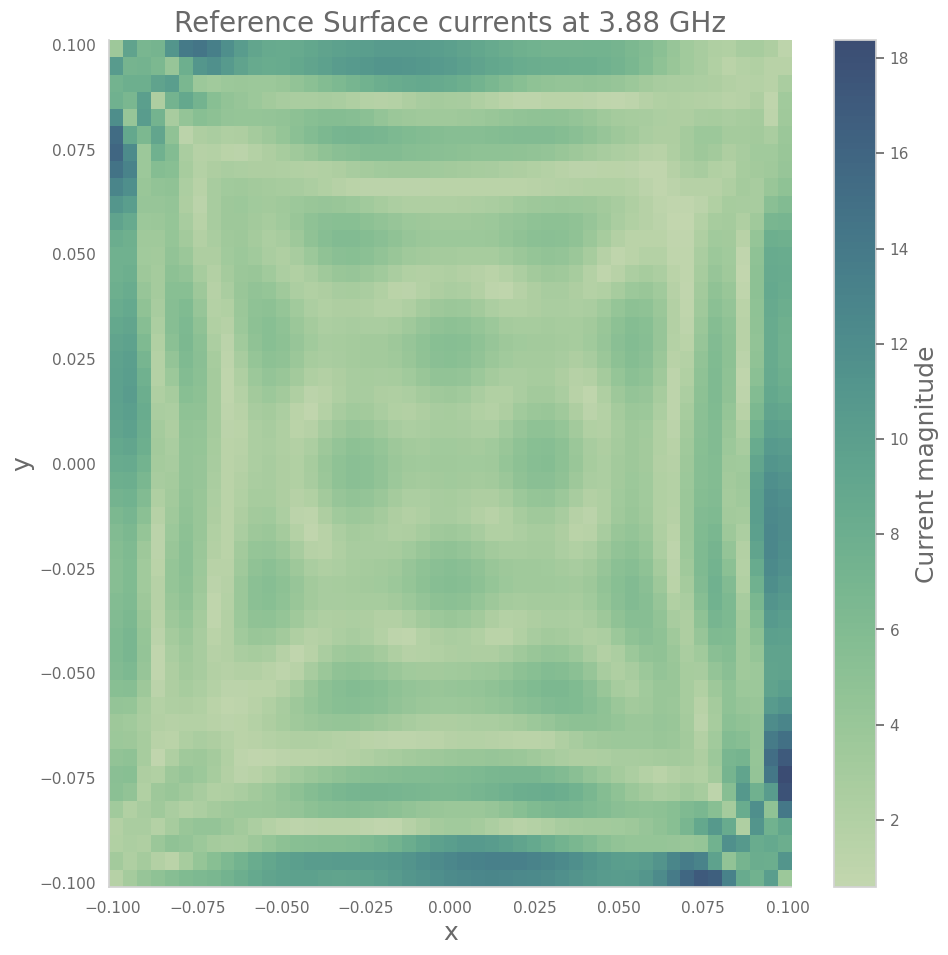

In [47]:
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_ref['x'].min(), df_ref['x'].max(), nx)
yi = np.linspace(df_ref['y'].min(), df_ref['y'].max(), ny)

# Create a 2D histogram (like binning the data)
grid, xedges, yedges = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi], weights=df_ref['freq93=3.88'])

# Normalize by counts to get average value per bin
counts, _, _ = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi])
with np.errstate(divide='ignore', invalid='ignore'):
    grid_normalized = np.where(counts > 0, grid / counts, np.nan)

# Plot using imshow
plt.imshow(grid_normalized.T, origin='lower',
           extent=[df_ref['x'].min(),df_ref['x'].max(),df_ref['y'].min(), df_ref['y'].max()],
           aspect='auto', cmap=sns_palette)

plt.colorbar(label='Current magnitude')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reference Surface currents at 3.88 GHz')
plt.show()

### Iterate over all some frequency columns in a dataframe and plot currents w.r.t freq

freq1=2.50


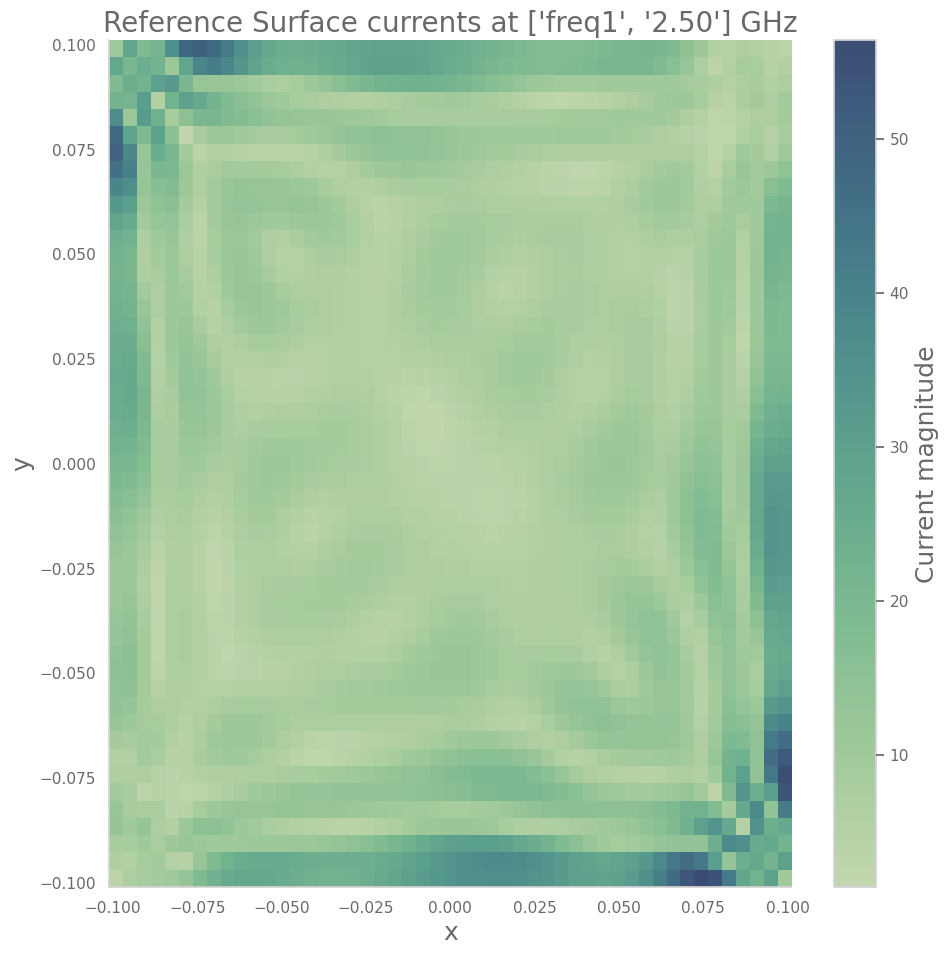

freq2=2.52


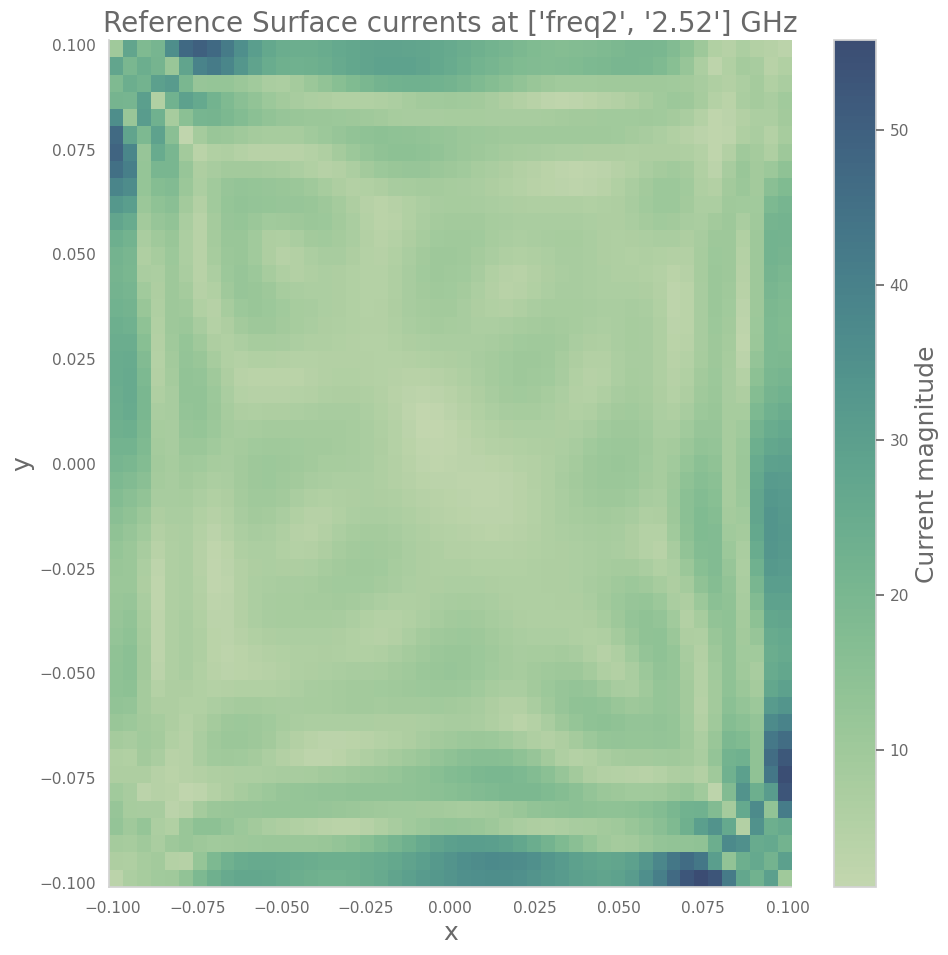

freq3=2.53


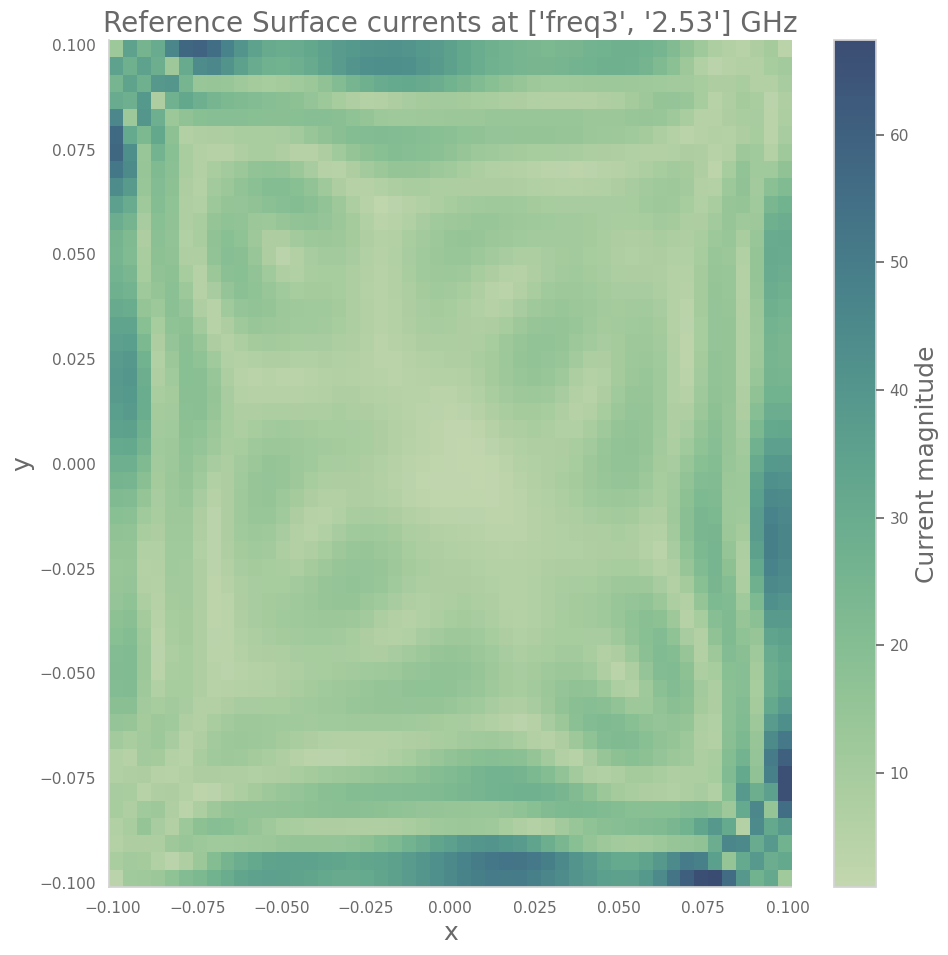

freq4=2.54


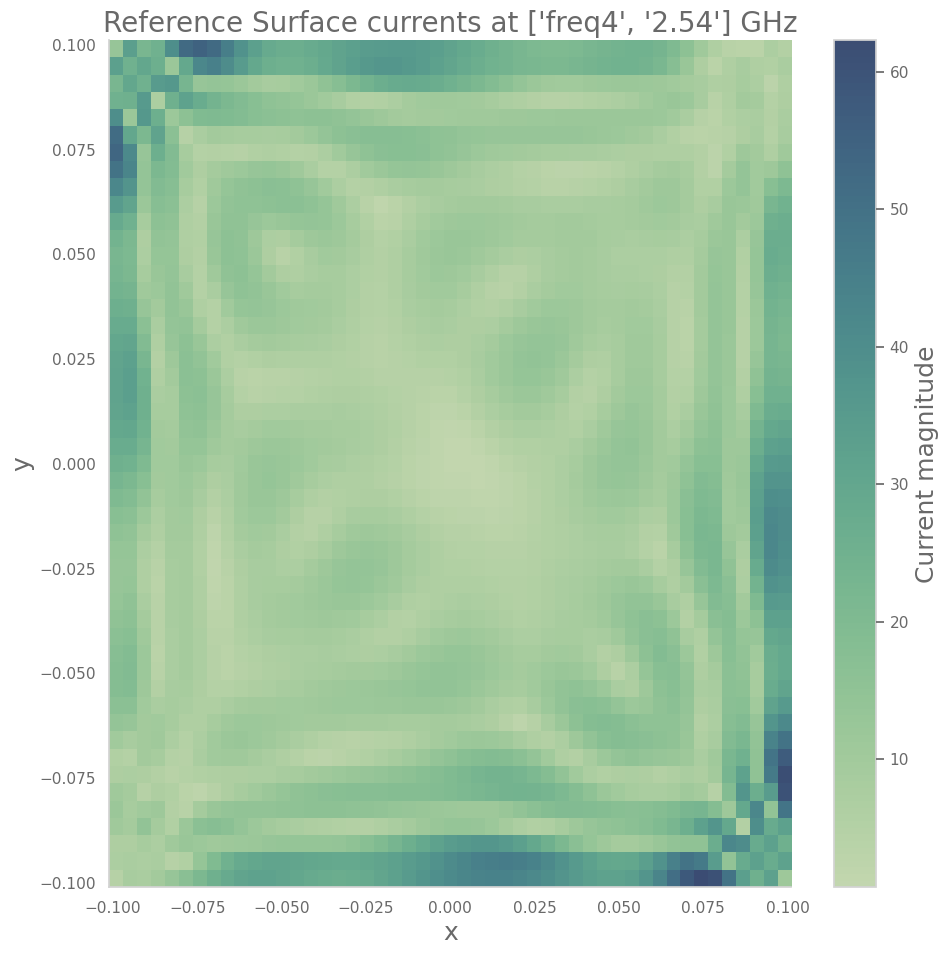

freq5=2.56


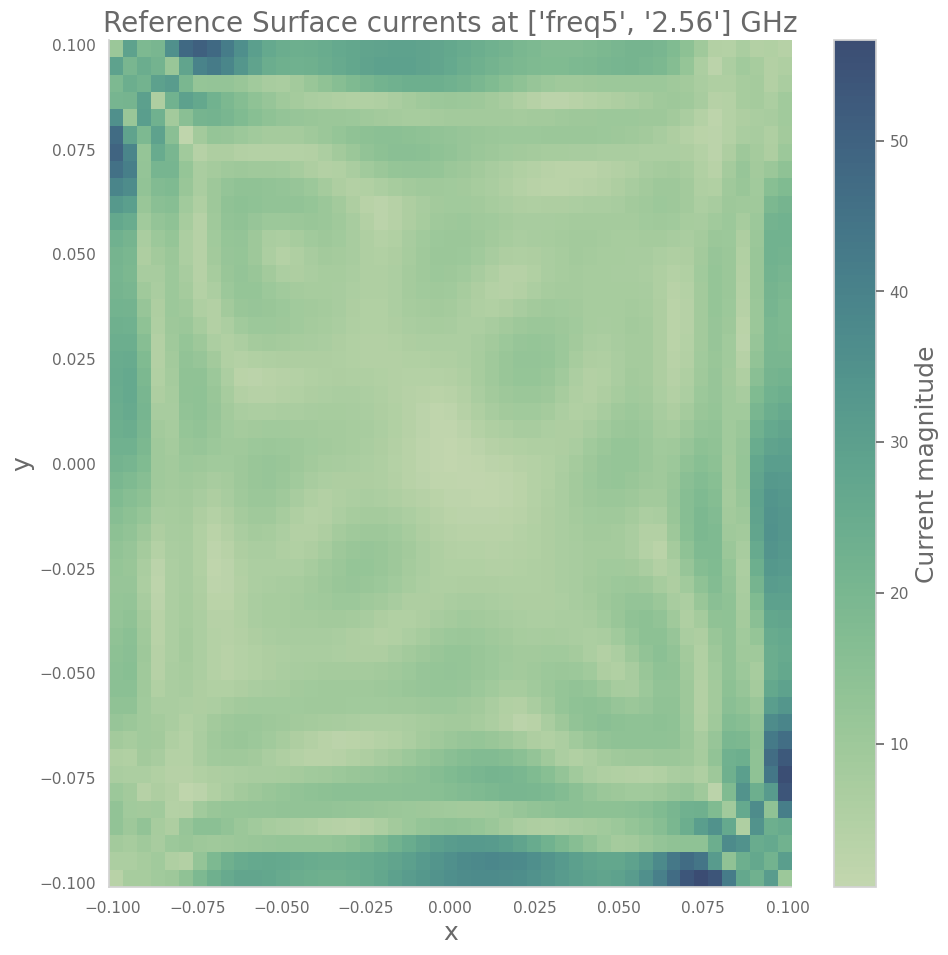

freq6=2.58


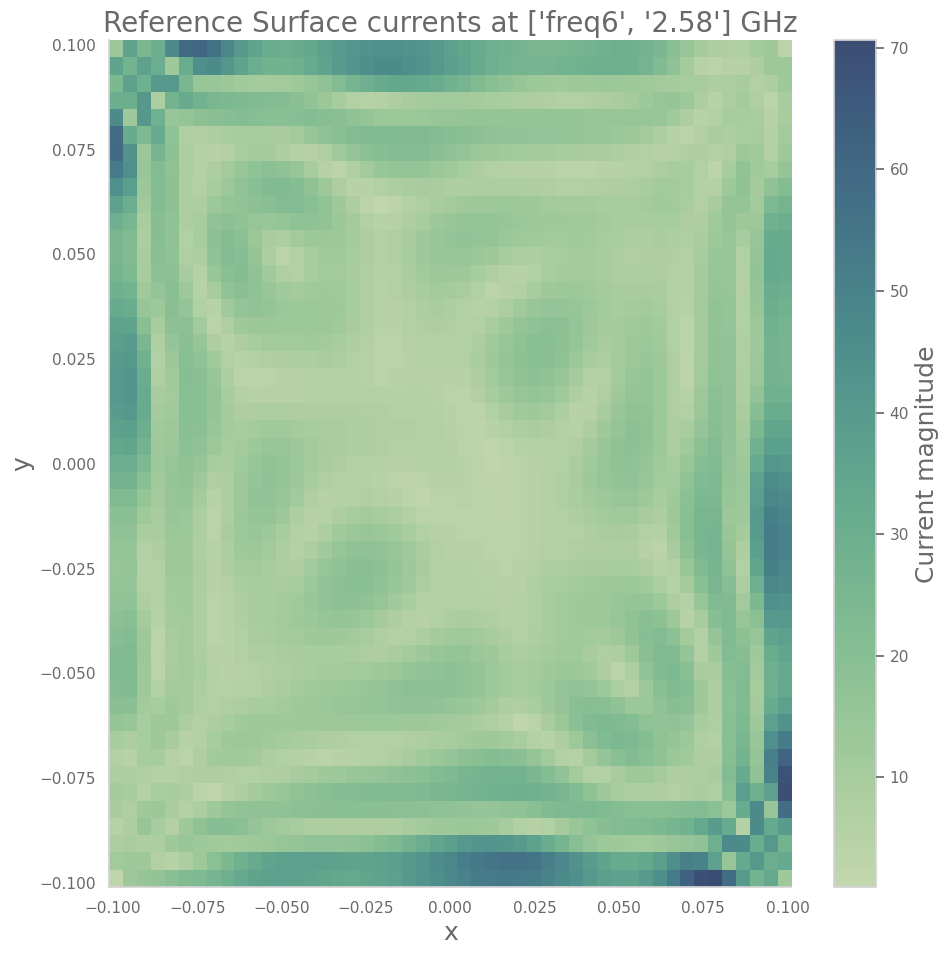

freq7=2.59


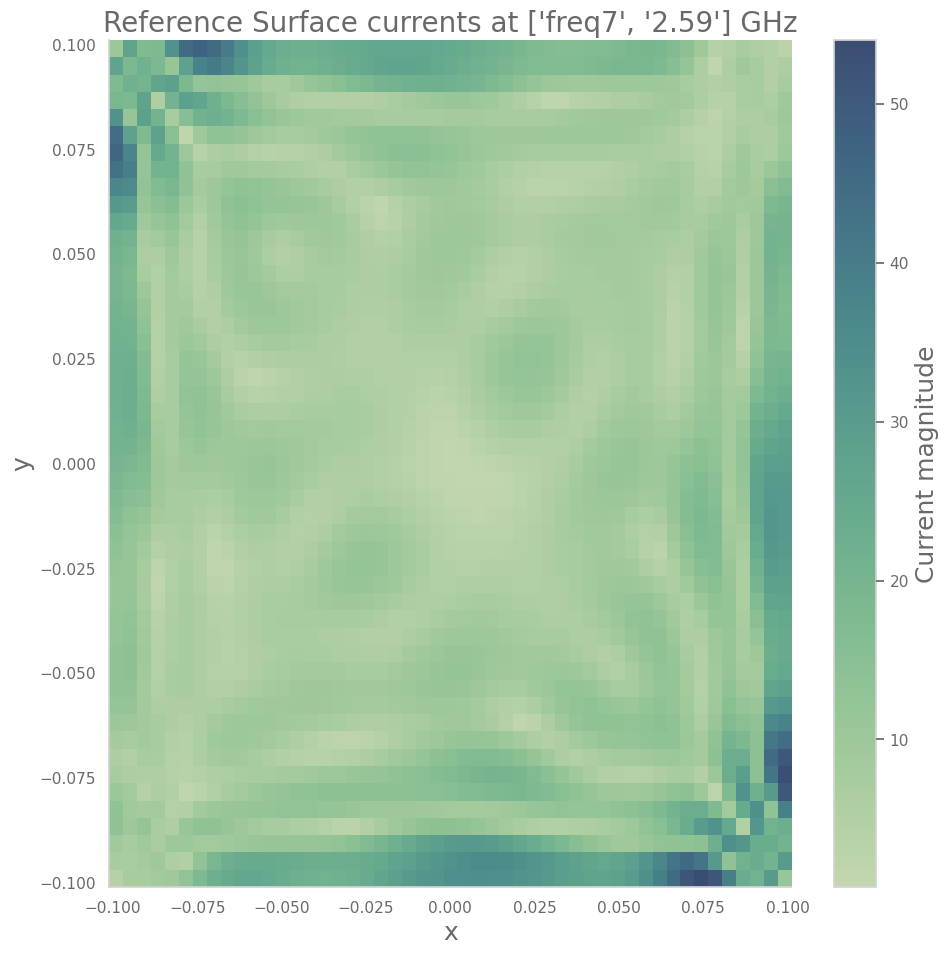

In [48]:
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_original['x'].min(), df_original['x'].max(), nx)
yi = np.linspace(df_original['y'].min(), df_original['y'].max(), ny)

for col_name in df_original.columns[3:10]:
    col_data = df_original[col_name]
    freq = col_name.split('=')
    print(f"{col_name}")
    # Create a 2D histogram (like binning the data)
    grid, xedges, yedges = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi], weights=col_data)

#    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
        
#     # Plot using imshow
    plt.imshow(grid_normalized.T, origin='lower',extent=[df_original['x'].min(),df_original['x'].max(),df_original['y'].min(), df_original['y'].max()], aspect='auto', cmap=sns_palette)
    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Reference Surface currents at {freq} GHz')
    plt.show()

### Run the cell below (creating a fresh folder to save all the frames) one time for original currents

In [49]:
# Create a folder to store individual frames
#os.makedirs("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/original_frames")


In [50]:
frame_path = os.path.join("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/original_frames")            
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_original['x'].min(), df_original['x'].max(), nx)
yi = np.linspace(df_original['y'].min(), df_original['y'].max(), ny)

for col_name in df_original.columns[3:104]:
    col_data = df_original[col_name]
    freq = col_name.split('=')[1]
    #print(f"{freq} GHz")
    # Create a 2D histogram (like binning the data)
    grid, xedges, yedges = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi], weights=col_data)

    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
        
    # Plot using imshow
    plt.imshow(grid_normalized.T, origin='lower',
           extent=[df_original['x'].min(),df_original['x'].max(),df_original['y'].min(), df_original['y'].max()],
           aspect='auto', cmap=sns_palette)

    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Original Surface currents at {freq} GHz')
    framename = f'frame_{freq}.png'
    file = os.path.join(frame_path, framename)
    plt.savefig(file)
    plt.close()

### Find minimum and maximum values of surface current across frequencies to set the color scale

In [51]:
selected = df_original.iloc[:, 3:103]
vmin_original = selected.min().min()
vmax_original = selected.max().max()
print(vmin_original, vmax_original)

0.157859485907705 86.4472415719285


### Generate one image or frame of the original surface current per frequency. This will be later read to make a movie

In [52]:
frame_path = os.path.join("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/original_frames_v2")            
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_original['x'].min(), df_original['x'].max(), nx)
yi = np.linspace(df_original['y'].min(), df_original['y'].max(), ny)

for idx, col_name in enumerate(df_original.columns[3:104], start=3):
    col_data = df_original[col_name]
    freq = col_name.split('=')[1]
    # Create a 2D histogram (like binning the data)
    grid, xedges, yedges = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi], weights=col_data)

    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_original['x'], df_original['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
        
    # Plot using imshow
    plt.imshow(grid_normalized.T, origin='lower',
           extent=[df_original['x'].min(),df_original['x'].max(),df_original['y'].min(), df_original['y'].max()],
           aspect='auto', cmap='jet',norm=matplotlib.colors.LogNorm())

    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Original Surface currents at {freq} GHz')
    framename = f'frame_{idx:03d}.png'
    file = os.path.join(frame_path, framename)
    plt.savefig(file)
    plt.close()

2.50 GHz
2.52 GHz
2.53 GHz
2.54 GHz
2.56 GHz
2.58 GHz
2.59 GHz
2.60 GHz
2.62 GHz
2.63 GHz
2.65 GHz
2.67 GHz
2.68 GHz
2.69 GHz
2.71 GHz
2.73 GHz
2.74 GHz
2.75 GHz
2.77 GHz
2.79 GHz
2.80 GHz
2.81 GHz
2.83 GHz
2.84 GHz
2.86 GHz
2.88 GHz
2.89 GHz
2.90 GHz
2.92 GHz
2.94 GHz
2.95 GHz
2.96 GHz
2.98 GHz
3.00 GHz
3.01 GHz
3.02 GHz
3.04 GHz
3.05 GHz
3.07 GHz
3.08 GHz
3.10 GHz
3.12 GHz
3.13 GHz
3.15 GHz
3.16 GHz
3.17 GHz
3.19 GHz
3.21 GHz
3.22 GHz
3.23 GHz
3.25 GHz
3.27 GHz
3.28 GHz
3.29 GHz
3.31 GHz
3.33 GHz
3.34 GHz
3.35 GHz
3.37 GHz
3.38 GHz
3.40 GHz
3.42 GHz
3.43 GHz
3.45 GHz
3.46 GHz
3.48 GHz
3.49 GHz
3.50 GHz
3.52 GHz
3.54 GHz
3.55 GHz
3.56 GHz
3.58 GHz
3.60 GHz
3.61 GHz
3.62 GHz
3.64 GHz
3.66 GHz
3.67 GHz
3.69 GHz
3.70 GHz
3.71 GHz
3.73 GHz
3.75 GHz
3.76 GHz
3.77 GHz
3.79 GHz
3.81 GHz
3.82 GHz
3.83 GHz
3.85 GHz
3.87 GHz
3.88 GHz
3.90 GHz
3.91 GHz
3.92 GHz
3.94 GHz
3.96 GHz
3.97 GHz
3.98 GHz
4.00 GHz


### Load the frames of the original surface currents to make a movie

In [53]:
# Load images using Pillow
frame_files = [os.path.join(frame_path, f"frame_{i:03d}.png") for i in range(3,104)]
frames = [Image.open(f) for f in frame_files]
filename = 'original_currents_animated_jet_lognorm.gif'
file = os.path.join(file_path, filename)
# Save as animated GIF
frames[0].save(
    file,
    save_all=True,
    append_images=frames[1:],
    duration=500,  # milliseconds per frame
    loop=0  # infinite loop
)


### Run the cell below (creating a fresh folder to save all the frames) one time for reference currents

In [54]:
# Create a folder to store individual frames
#os.makedirs("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/reference_frames_freq")


In [55]:
frame_path = os.path.join("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/reference_frames_freq")            
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_ref['x'].min(), df_ref['x'].max(), nx)
yi = np.linspace(df_ref['y'].min(), df_ref['y'].max(), ny)

for col_name in df_ref.columns[3:104]:
    col_data = df_ref[col_name]
    freq = col_name.split('=')[1]
    #print(f"{freq} GHz")
    # Create a 2D histogram (like binning the data)
    grid, xedges, yedges = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi], weights=col_data)

    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
        
    # Plot using imshow
    plt.imshow(grid_normalized.T, origin='lower',
           extent=[df_ref['x'].min(),df_ref['x'].max(),df_ref['y'].min(), df_ref['y'].max()],
           aspect='auto', cmap=sns_palette)

    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Reference Surface currents at {freq} GHz')
    framename = f'frame_{freq}.png'
    file = os.path.join(frame_path, framename)
    plt.savefig(file)
    plt.close()

### Find minimum and maximum values of surface current across frequencies to set the color scale

In [56]:
selected = df_ref.iloc[:, 3:103]
vmin_original = selected.min().min()
vmax_original = selected.max().max()
print(vmin_original, vmax_original)

0.209036003256993 71.2325292636779


### Generate one image or frame of the original surface current per frequency. This will be later read to make a movie

In [57]:
frame_path = os.path.join("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/reference_frames_v2")            
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(df_ref['x'].min(), df_ref['x'].max(), nx)
yi = np.linspace(df_ref['y'].min(), df_ref['y'].max(), ny)

for idx, col_name in enumerate(df_ref.columns[3:104], start=3):
    col_data = df_ref[col_name]
    freq = col_name.split('=')[1]
    #print(f"{freq} GHz")
    # Create a 2D histogram (like binning the data)
    grid, xedges, yedges = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi], weights=col_data)

    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
        
    # Plot using imshow
    plt.imshow(grid_normalized.T, origin='lower',
           extent=[df_ref['x'].min(),df_ref['x'].max(),df_ref['y'].min(), df_ref['y'].max()],
           aspect='auto', cmap='jet',norm=matplotlib.colors.LogNorm())

    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Reference Surface currents at {freq} GHz')
    framename = f'frame_{idx:03d}.png'
    file = os.path.join(frame_path, framename)
    plt.savefig(file)
    plt.close()

### Load the frames of the original surface currents to make a movie

In [58]:
# Load images using Pillow
frame_files = [os.path.join(frame_path, f"frame_{i:03d}.png") for i in range(3,104)]
frames = [Image.open(f) for f in frame_files]
filename = 'reference_currents_animated_jet_lognorm.gif'
file = os.path.join(file_path, filename)
# Save as animated GIF
frames[0].save(
    file,
    save_all=True,
    append_images=frames[1:],
    duration=500,  # milliseconds per frame
    loop=0  # infinite loop
)

### Check if the x, y, and z values in the original and reference currents match

In [59]:
comparison_x = df_original['x'] == df_ref['x']
false_indices_x = np.where(comparison_x == False)[0]
print("False values found at indices in x:", false_indices_x)
comparison_y = df_original['y'] == df_ref['y']
false_indices_y = np.where(comparison_y == False)[0]
print("False values found at indices in y:", false_indices_y)
comparison_z = df_original['z'] == df_ref['z']
false_indices_z = np.where(comparison_z == False)[0]
print("False values found at indices in z:", false_indices_z)

False values found at indices in x: []
False values found at indices in y: []
False values found at indices in z: []


### Once positions of x, y, z are identical -- Subtract the 2 cubes : original currents - reference currents

In [60]:
# Get columns from both DataFrames by index
df_original_selected = df_original.iloc[:, 3:104]
df_ref_selected = df_ref.iloc[:, 3:104]

# Subtract and retain df1's column names
difference = df_original_selected.values - df_ref_selected.values
difference_df = pd.DataFrame(difference, columns=df_original_selected.columns)
# Select first 3 columns from df_source
position_df = df_original.iloc[:, :3]

# Concatenate them as the first columns of df_target
difference_df = pd.concat([position_df, difference_df], axis=1)

### Find minimum and maximum values of difference in surface current across frequencies to set the color scale

In [70]:
selected = difference_df.iloc[:, 3:104]
vmin_diff = selected.min().min()
vmax_diff = selected.max().max()
print(vmin_original, vmax_original)

0.209036003256993 71.2325292636779


In [71]:
frame_path = os.path.join("/home/msrao/Workspace/L1_RRIDistortionLab/L2_APSERa/L3_APSERa_data/L4_surface_currents/Current_images/difference_frames_v1")            
# Define the grid resolution
nx, ny = 50,50  # number of pixels along x and y

# Create a 2D grid
xi = np.linspace(difference_df['x'].min(), difference_df['x'].max(), nx)
yi = np.linspace(difference_df['y'].min(), difference_df['y'].max(), ny)

for idx, col_name in enumerate(difference_df.columns[3:104],start=3):
    col_data = difference_df[col_name]
    freq = col_name.split('=')[1]
    #print(f"{freq} GHz")
    # Create a 2D histogram (like binning the data)
    grid, xedges, yedges = np.histogram2d(difference_df['x'], difference_df['y'], bins=[xi, yi], weights=col_data)

    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_ref['x'], df_ref['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
        
    # Plot using imshow
    plt.imshow(grid_normalized.T, origin='lower',
           extent=[difference_df['x'].min(),difference_df['x'].max(),difference_df['y'].min(), difference_df['y'].max()],
           aspect='auto', cmap='jet',vmin = vmin_diff,vmax = vmax_diff)

    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Original - Reference currents at {freq} GHz')
    framename = f'frame_{idx:03d}.png'
    file = os.path.join(frame_path, framename)
    plt.savefig(file)
    plt.close()

In [ ]:
### Load the frames of the difference surface currents to make a movie

In [72]:
# Load images using Pillow
frame_files = [os.path.join(frame_path, f"frame_{i:03d}.png") for i in range(3,104)]
frames = [Image.open(f) for f in frame_files]
filename = 'difference_currents_animated_jet_lognorm.gif'
file = os.path.join(file_path, filename)
# Save as animated GIF
frames[0].save(
    file,
    save_all=True,
    append_images=frames[1:],
    duration=500,  # milliseconds per frame
    loop=0  # infinite loop
)

In [80]:
# # create an Empty DataFrame object
# df_difference_stats = pd.DataFrame()
# # Compute row-wise statistics, i.e. pixel wise statistics of the selected columns from the difference dataframe
# df_difference_stats['mean'] = difference_df[3:104].mean(axis=0)
# df_difference_stats['std'] = difference_df[3:104].std(axis=0)
# df_difference_stats['min'] = difference_df[3:104].min(axis=0)
# df_difference_stats['max'] = difference_df[3:104].max(axis=0)
# #df_difference_stats.head
# df_difference_stats.head


<bound method NDFrame.head of                   mean       std       min        max
x            -0.015182  0.057920 -0.101115   0.101115
y            -0.100292  0.001272 -0.101115  -0.098345
z             0.000000  0.000000  0.000000   0.000000
freq1=2.50    5.203067  5.128138 -4.534127  16.851403
freq2=2.52    5.326004  5.179708 -4.488823  17.005014
...                ...       ...       ...        ...
freq97=3.94   5.620800  4.218346 -1.202804  13.073518
freq98=3.96   6.921921  4.993619 -2.765674  17.435152
freq99=3.97   4.941449  3.587049 -0.593033  12.018340
freq100=3.98  6.636614  4.358547 -0.755258  16.268198
freq101=4.00  5.771206  3.702693  0.078588  13.633886

[104 rows x 4 columns]>

In [84]:
selected = difference_df.iloc[:, 3:104]
np.shape(selected)
diff_mean = np.mean(selected,axis=1)
diff_std = np.std(selected,axis=1)
diff_min = np.min(selected,axis=1)
diff_max = np.max(selected,axis=1)
df_difference_stats = pd.DataFrame()
# Select first 3 columns from df_source
position_df = df_original.iloc[:, :3]

# Concatenate them as the first columns of df_target
df_difference_stats = pd.concat([position_df, df_difference_stats], axis=1)
df_difference_stats['mean']=diff_mean
df_difference_stats['std']=diff_std
df_difference_stats['min']=diff_min
df_difference_stats['max']=diff_max
df_difference_stats.head

<bound method NDFrame.head of              x         y  z      mean       std       min        max
0    -0.101115 -0.101115  0  0.613754  1.230219 -1.745000   2.744608
1    -0.098345 -0.101115  0  2.585225  2.710858 -2.905833   6.879071
2    -0.095574 -0.101115  0  2.520424  2.902044 -2.589246  10.972173
3    -0.092804 -0.101115  0  2.450567  3.714178 -3.166834   9.941319
4    -0.090034 -0.101115  0  4.336524  5.807474 -2.572090  15.633421
...        ...       ... ..       ...       ...       ...        ...
5471  0.090034  0.101115  0  4.325625  7.233052 -3.715715  17.640773
5472  0.092804  0.101115  0  3.914639  3.935040 -2.027806  11.873701
5473  0.095574  0.101115  0  3.459653  3.184053 -1.596064  10.882119
5474  0.098345  0.101115  0  3.265376  2.857255 -1.752828   9.316778
5475  0.101115  0.101115  0  0.781931  0.973427 -1.088769   2.500546

[5476 rows x 7 columns]>

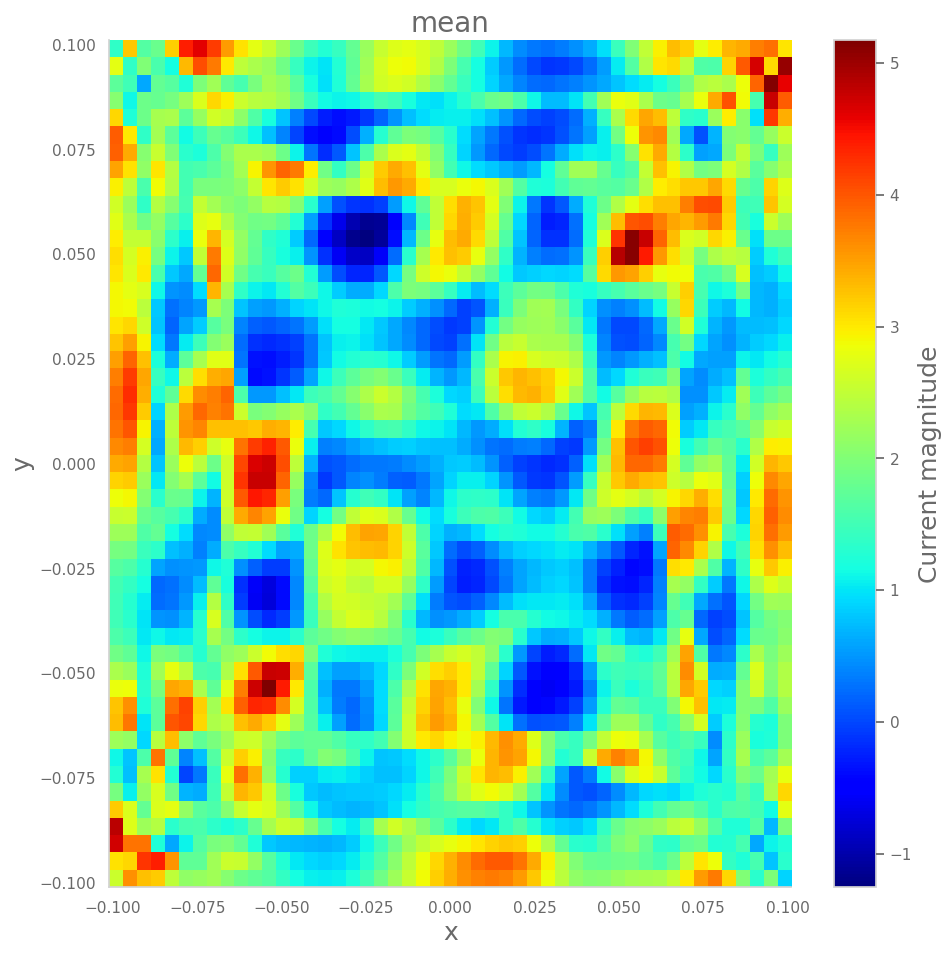

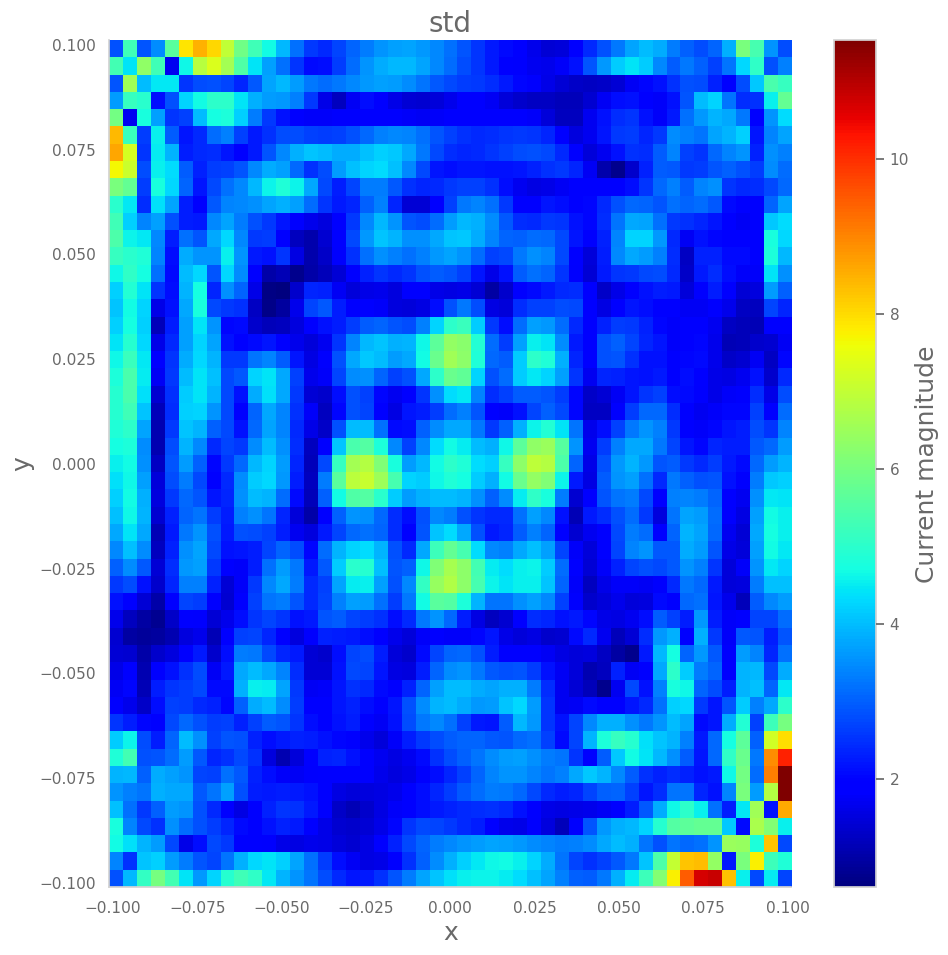

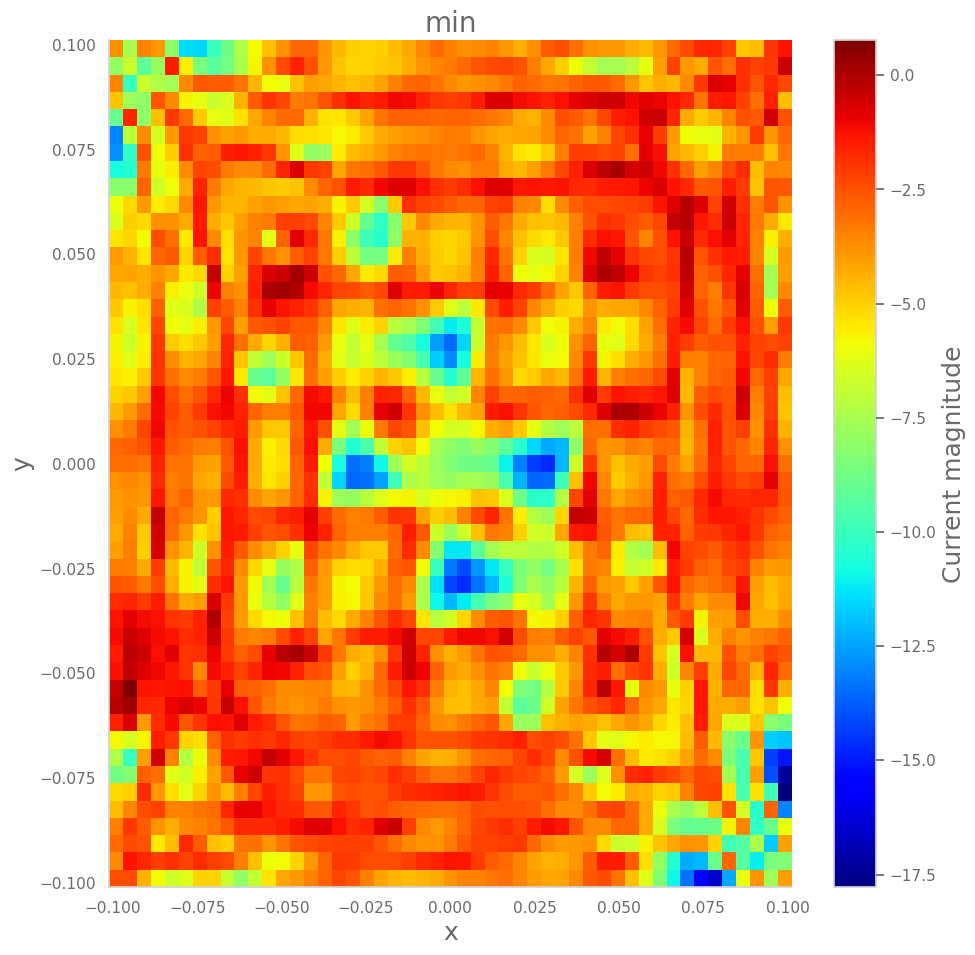

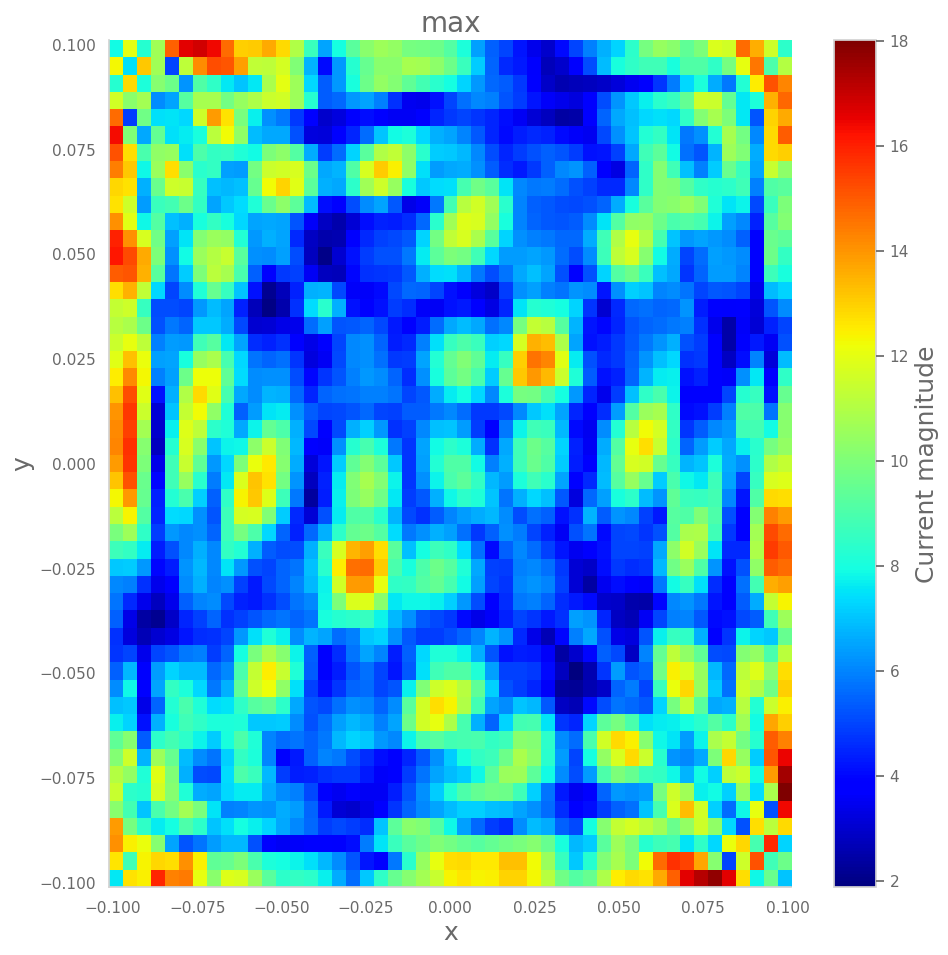

In [92]:
for idx, col_name in enumerate(df_difference_stats.columns[3:7],start=3):
    col_data = df_difference_stats[col_name]
    stat = col_name
    grid, xedges, yedges = np.histogram2d(df_difference_stats['x'], df_difference_stats['y'], bins=[xi, yi], weights=col_data)

    # Normalize by counts to get average value per bin
    counts, _, _ = np.histogram2d(df_difference_stats['x'], df_difference_stats['y'], bins=[xi, yi])
    with np.errstate(divide='ignore', invalid='ignore'):
        grid_normalized = np.where(counts > 0, grid / counts, np.nan)
    plt.imshow(grid_normalized.T, origin='lower',
        extent=[df_difference_stats['x'].min(),df_difference_stats['x'].max(),df_difference_stats['y'].min(), df_difference_stats['y'].max()],
        aspect='auto', cmap='jet')

    plt.colorbar(label='Current magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{stat}')
    filename = f'Difference_{stat}_jet.png'
    file = os.path.join(file_path, filename)
    plt.savefig(file)
    plt.show()